In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import seaborn as sns
import pprint
from pylab import *

In [3]:
path = 'E:/SUBJECTS/497 MATH S17 PSP--/Data/'
interpath= 'E:/SUBJECTS/497 MATH S17 PSP--/Data/intermediate/'

Original data

In [5]:
family_hist=pd.read_pickle(path+'family_hist_list.pickle')
print family_hist.shape
print len(family_hist.Person_Nbr.drop_duplicates())
family_hist.head()

(59203, 7)
14044


,Person_ID,Person_Nbr,Date_Created,Code,Code_System,Family_History,Relation
47872,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,2014-12-18 14:47:15.980,160347007,SNOMED,Glaucoma,Father
47869,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,2014-12-18 14:47:26.897,160274005,SNOMED,No history of Diabetes mellitus,Mother
47867,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,2014-12-18 14:47:28.590,160274005,SNOMED,No history of Diabetes mellitus,Father
47871,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,2014-12-18 14:47:29.563,160267000,SNOMED,No history of Glaucoma,Mother
47868,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,2014-12-18 15:55:35.837,439724007,SNOMED,Heart disease,Brother


3488 Null values in Code and Code_System

In [39]:
sum(pd.isnull(family_hist.Code_System))

3488

444 Unique relationships 

In [13]:
print len(family_hist.Relation.unique())
family_hist.Relation.unique()

444


array(['Father', 'Mother', 'Brother', 'Sister', 'Paternal uncle',
       'Maternal grandfather', nan, 'Maternal grandmother', 'Daughter',
       'Maternal aunt', 'Family', 'Paternal grandmother', 'Maternal uncle',
       'Paternal grandfather', 'Son', 'Cousin', 'mother',
       'Younger brother', 'Niece', 'Twin brother', 'Sister Daughter',
       "Mother's side", "Father's side", 'siblings', 'Sister (4 of them)',
       'Father and sister', 'family history', 'Aunt', 'Cousins',
       'Maternal great aunt', 'Unknown', 'Nephew', 'Multiple Relatives',
       'Parents', 'Paternal aunt', 'Family history', 'Mother Father Sist',
       'Mother sister', 'Uncle', 'MGF', 'MGM brother', 'Brother sister',
       'Aunt (maternal)', 'Sickle', 'Mothers Side', 'Fathers Side',
       'parents', 'everyone', 'Multiple', 'father', 'Mother & Father',
       'Motherfathersis', 'Mother Sister', 'Siblings',
       'Mother brother fat', 'Brother mother', 'Mother MGM',
       'Grandparents both', 'father sister

Cleaned the data: 
Grouped all relations into six categories and imputed codes at 2296 places from mapping the Family_History column to Code and background research

In [14]:
fam_his=pd.read_csv(interpath+'family_hist-csv (1).csv')
print fam_his.shape
print len(fam_his.Person_Nbr.drop_duplicates())
print "null values:"
print sum(pd.isnull(fam_his.Code))
print len(fam_his.Relation.unique())
print fam_his.Relation.unique()
fam_his.head()

(59186, 9)
14044
null values:
1192
6
['Parents' 'Siblings' 'Relatives' 'Grandparents' 'Children' 'Spouse']


,Column,index,Person_ID,Person_Nbr,Date_Created,Code,Code_System,Family_History,Relation
0,0,47872,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,2014-12-18 14:47:15.980,160347007.0,SNOMED,Glaucoma,Parents
1,1,47869,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,2014-12-18 14:47:26.897,160274005.0,SNOMED,No history of Diabetes mellitus,Parents
2,2,47867,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,2014-12-18 14:47:28.590,160274005.0,SNOMED,No history of Diabetes mellitus,Parents
3,3,47871,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,2014-12-18 14:47:29.563,160267000.0,SNOMED,No history of Glaucoma,Parents
4,4,47868,80d3df88-dddf-5ad3-7cc1-b7b1ac6151fa,33,2014-12-18 15:55:35.837,439724007.0,SNOMED,Heart Disease,Siblings


In [17]:
del fam_his["Column"]

Understanding and plotting the frequencies 

In [27]:
relfr={k:len(v.drop_duplicates()) for k,v in fam_his.groupby('Relation').Person_Nbr}
relfr1=sorted(relfr.items(), key=lambda x:x[1], reverse=True)
relfr1

[('Parents', 13095),
 ('Siblings', 2988),
 ('Grandparents', 1469),
 ('Relatives', 1469),
 ('Children', 519),
 ('Spouse', 3)]

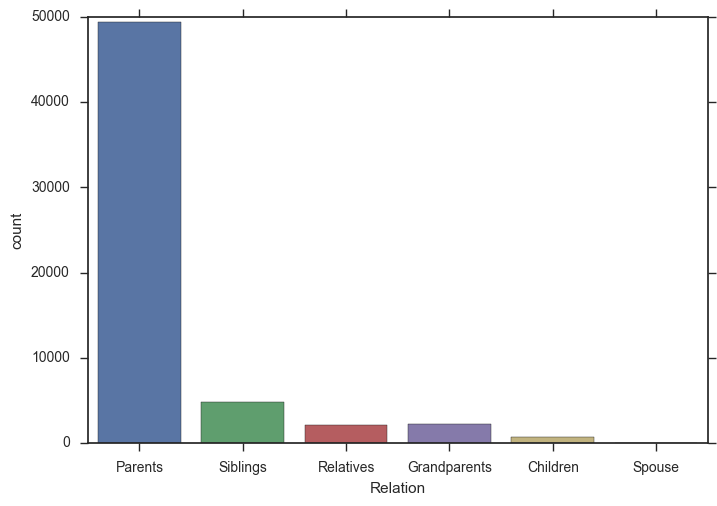

In [18]:
sns.set(style="ticks", color_codes=True)
sns.countplot(x="Relation", data=fam_his)
sns.plt.show()

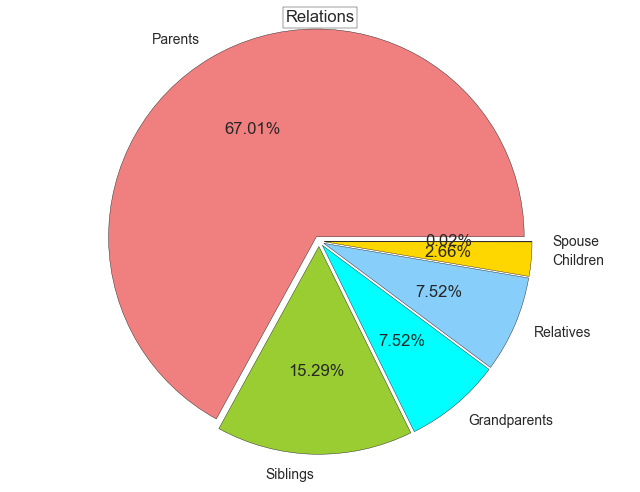

In [34]:
labels = 'Parents', 'Siblings', 'Grandparents', 'Relatives',"Children","Spouse"
fracs = [relfr1[0][1],relfr1[1][1],relfr1[2][1],relfr1[3][1],relfr1[4][1],relfr1[5][1]]
colors = ['lightcoral', 'yellowgreen', 'cyan', 'lightskyblue','gold','blue']
explode = (0.025, 0.025, 0.025, 0.025,0.025,0.025)  # explode 1st slice
pie(fracs, labels=labels,autopct='%1.2f%%',colors=colors,explode=explode)
plt.axis('equal')
title('Relations',bbox={'facecolor':'white', 'pad':2})
show()

Most frequent codes 

[(160267000.0, 'No history of Glaucoma'),
 (160274005.0, 'No history of Diabetes mellitus'),
 (416855002.0, 'Diabetes'),
 (160357008.0, 'HBP'),
 (160347007.0, 'Glaucoma'),
 (407559004.0, 'Unknown'),
 (430679000.0, 'Diabetes Type 2'),
 (160303001.0, 'Diabetes'),
 (439724007.0, 'Heart Disease'),
 (275134007.0, 'Arthritis')]


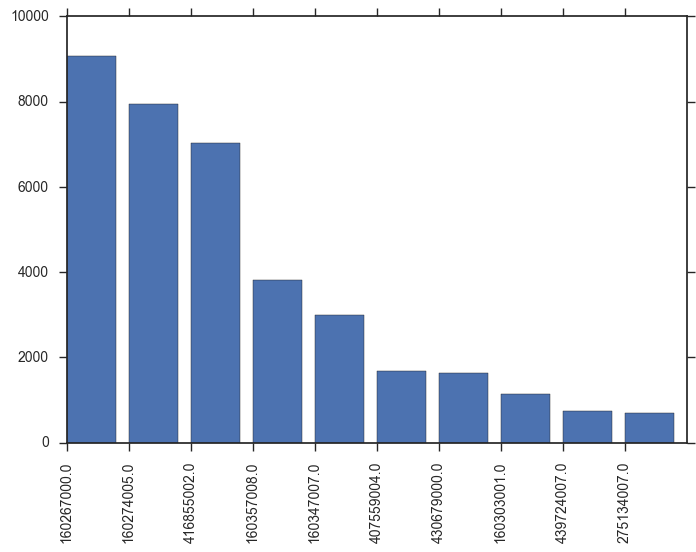

In [40]:
codefr={k:len(v.drop_duplicates()) for k,v in fam_his.groupby('Code').Person_Nbr}
temp=sorted(codefr.items(), key=lambda x:x[1], reverse=True)[:10]
pprint.pprint([(k[0],fam_his.groupby('Code').first().loc[k[0],'Family_History']) for k in temp])
plt.bar(range(0,len(temp)), [item[1] for item in temp])
plt.xticks(range(0,len(temp)), [item[0] for item in temp], rotation='vertical')
plt.show()

Separate frequency graphs for each type of Relation 

In [41]:
Parents=fam_his[fam_his.Relation=='Parents']
Siblings=fam_his[fam_his.Relation=='Siblings']
Relatives=fam_his[fam_his.Relation=='Relatives']
Grandparents=fam_his[fam_his.Relation=='Grandparents']
Children=fam_his[fam_his.Relation=='Children']
Spouse=fam_his[fam_his.Relation=='Spouse']

[(160267000.0, 'No history of Glaucoma'),
 (160274005.0, 'No history of Diabetes mellitus'),
 (416855002.0, 'Diabetes'),
 (160357008.0, 'HBP'),
 (160347007.0, 'Glaucoma'),
 (407559004.0, 'Unknown'),
 (430679000.0, 'Diabetes Type 2'),
 (439724007.0, 'Heart Disease'),
 (275134007.0, 'Arthritis'),
 (160348002.0, 'Cataracts')]


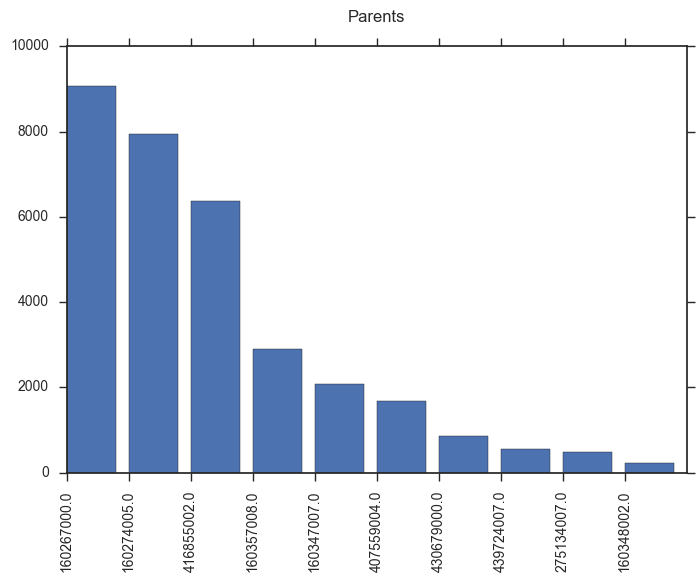

In [51]:
codefrp={k:len(v.drop_duplicates()) for k,v in Parents.groupby('Code').Person_Nbr}
temp=sorted(codefrp.items(), key=lambda x:x[1], reverse=True)[:10]
pprint.pprint([(k[0],fam_his.groupby('Code').first().loc[k[0],'Family_History']) for k in temp])
plt.bar(range(0,len(temp)), [item[1] for item in temp])
plt.xticks(range(0,len(temp)), [item[0] for item in temp], rotation='vertical')
plt.title('Parents\n')
plt.show()

[(160303001.0, 'Diabetes'),
 (160347007.0, 'Glaucoma'),
 (160357008.0, 'HBP'),
 (430679000.0, 'Diabetes Type 2'),
 (275134007.0, 'Arthritis'),
 (439724007.0, 'Heart Disease'),
 (275118009.0, 'Blindness'),
 (160348002.0, 'Cataracts'),
 (430678008.0, 'Diabetes Type 1'),
 (429740004.0, 'Breast Cancer')]


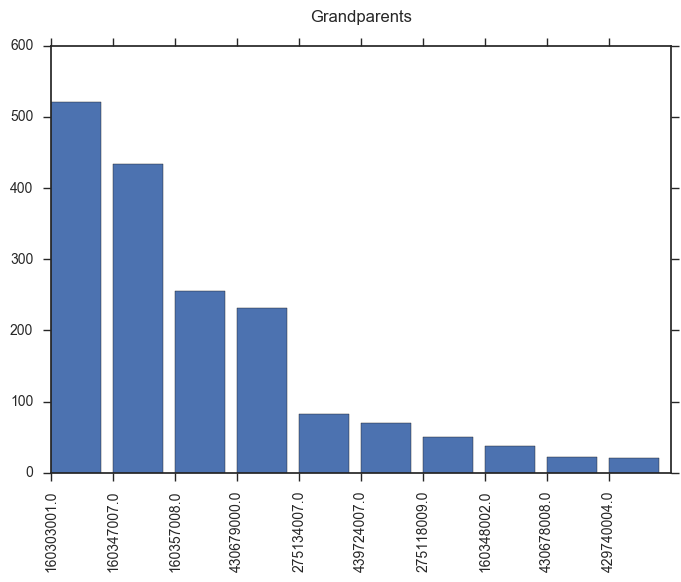

In [50]:
codefrgp={k:len(v.drop_duplicates()) for k,v in Grandparents.groupby('Code').Person_Nbr}
temp=sorted(codefrgp.items(), key=lambda x:x[1], reverse=True)[:10]
pprint.pprint([(k[0],fam_his.groupby('Code').first().loc[k[0],'Family_History']) for k in temp])
plt.bar(range(0,len(temp)), [item[1] for item in temp])
plt.xticks(range(0,len(temp)), [item[0] for item in temp], rotation='vertical')
plt.title('Grandparents\n')
plt.show()

[(416855002.0, 'Diabetes'),
 (160357008.0, 'HBP'),
 (430679000.0, 'Diabetes Type 2'),
 (160347007.0, 'Glaucoma'),
 (275134007.0, 'Arthritis'),
 (439724007.0, 'Heart Disease'),
 (160303001.0, 'Diabetes'),
 (160348002.0, 'Cataracts'),
 (430678008.0, 'Diabetes Type 1'),
 (430292006.0, 'Breast Cancer')]


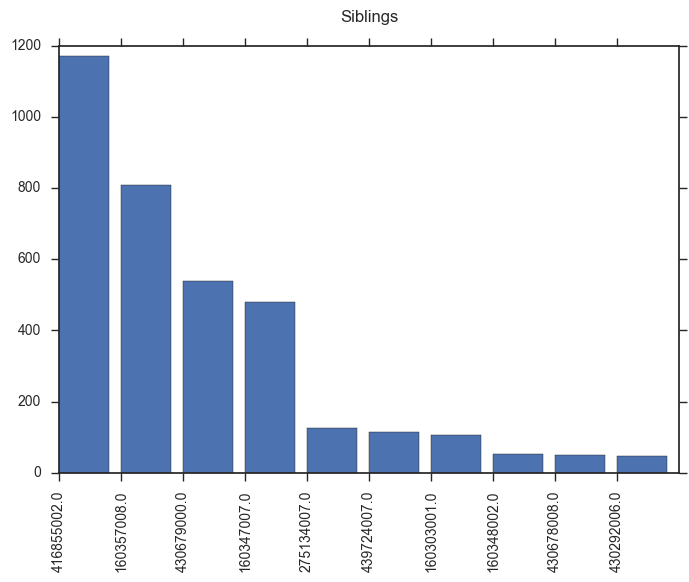

In [49]:
codefrs={k:len(v.drop_duplicates()) for k,v in Siblings.groupby('Code').Person_Nbr}
temp=sorted(codefrs.items(), key=lambda x:x[1], reverse=True)[:10]
pprint.pprint([(k[0],fam_his.groupby('Code').first().loc[k[0],'Family_History']) for k in temp])
plt.bar(range(0,len(temp)), [item[1] for item in temp])
plt.xticks(range(0,len(temp)), [item[0] for item in temp], rotation='vertical')
plt.title('Siblings\n')
plt.show()

[(416855002.0, 'Diabetes'),
 (160357008.0, 'HBP'),
 (430679000.0, 'Diabetes Type 2'),
 (160347007.0, 'Glaucoma'),
 (275134007.0, 'Arthritis'),
 (160303001.0, 'Diabetes'),
 (160346003.0, 'Amblyopia'),
 (439724007.0, 'Heart Disease'),
 (430678008.0, 'Diabetes Type 1'),
 (160377001.0, 'Asthma')]


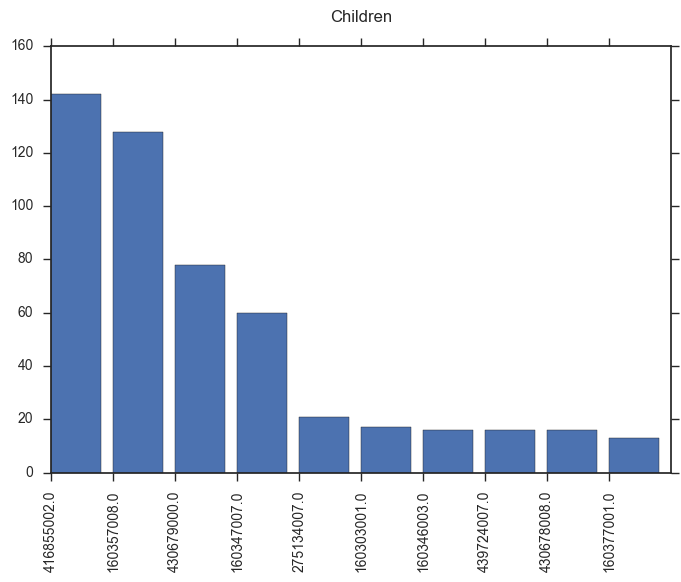

In [48]:
codefrc={k:len(v.drop_duplicates()) for k,v in Children.groupby('Code').Person_Nbr}
temp=sorted(codefrc.items(), key=lambda x:x[1], reverse=True)[:10]
pprint.pprint([(k[0],fam_his.groupby('Code').first().loc[k[0],'Family_History']) for k in temp])
plt.bar(range(0,len(temp)), [item[1] for item in temp])
plt.xticks(range(0,len(temp)), [item[0] for item in temp], rotation='vertical')
plt.title('Children\n')
plt.show()

[(160303001.0, 'Diabetes'),
 (160347007.0, 'Glaucoma'),
 (430679000.0, 'Diabetes Type 2'),
 (160357008.0, 'HBP'),
 (275118009.0, 'Blindness'),
 (275134007.0, 'Arthritis'),
 (439724007.0, 'Heart Disease'),
 (430678008.0, 'Diabetes Type 1'),
 (429740004.0, 'Breast Cancer'),
 (23986001.0, 'Glaucoma')]


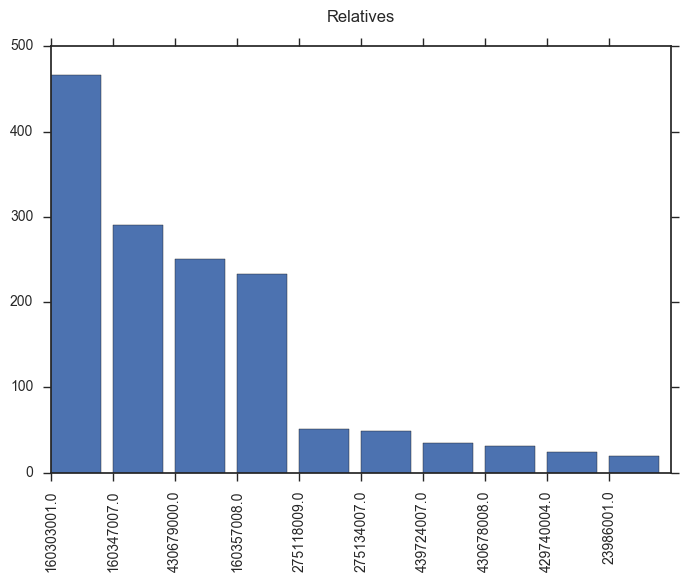

In [47]:
codefrr={k:len(v.drop_duplicates()) for k,v in Relatives.groupby('Code').Person_Nbr}
temp=sorted(codefrr.items(), key=lambda x:x[1], reverse=True)[:10]
pprint.pprint([(k[0],fam_his.groupby('Code').first().loc[k[0],'Family_History']) for k in temp])
plt.bar(range(0,len(temp)), [item[1] for item in temp])
plt.xticks(range(0,len(temp)), [item[0] for item in temp], rotation='vertical')
plt.title('Relatives\n')
plt.show()

[(160357008.0, 'HBP'),
 (430679000.0, 'Diabetes Type 2'),
 (275134007.0, 'Arthritis')]


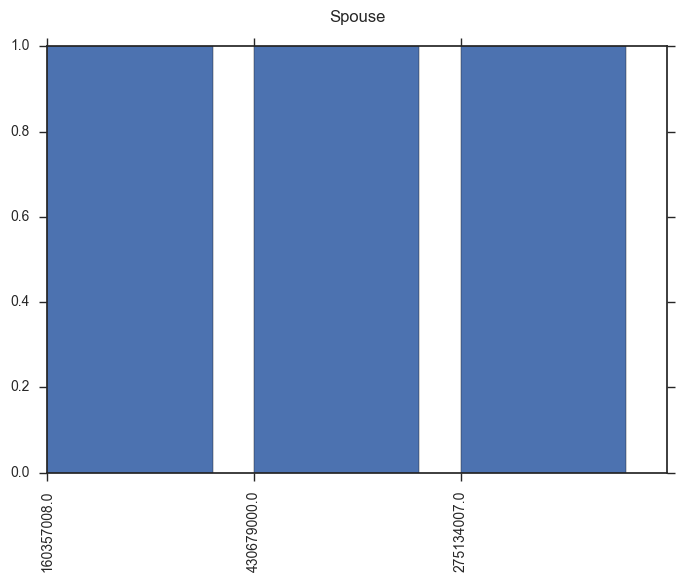

In [52]:
codefrsp={k:len(v.drop_duplicates()) for k,v in Spouse.groupby('Code').Person_Nbr}
temp=sorted(codefrsp.items(), key=lambda x:x[1], reverse=True)[:10]
pprint.pprint([(k[0],fam_his.groupby('Code').first().loc[k[0],'Family_History']) for k in temp])
plt.bar(range(0,len(temp)), [item[1] for item in temp])
plt.xticks(range(0,len(temp)), [item[0] for item in temp], rotation='vertical')
plt.title('Spouse\n')
plt.show()

In [24]:
single_person_all1=pd.read_csv(interpath+'single_person_all1.csv')
print single_person_all1.shape
single_person_all1.head()

(16087, 50)


,Unnamed: 0,Enc_Nbr,Person_Nbr,Smoking_Status,Primary_Payer,A1C,BMI,Glucose,BP_Systolic,BP_Diastolic,...,OD_SL_LENS,OS_SL_LENS,Enc_Yr_sl,Age,Zipn,Gender,Racen,Relation,Code,Family_History
0,0,123227.0,33.0,Never smoker,Premier Vision Plan,8.0,0.00,130.0,59.0,39.0,...,1+ NS 1-2+ ACC,1+ NS 1-2+ ACC,2012-10-16,68,60616.0,F,Black or African American,Parents;Siblings,"160347007.0,160274005.0,160274005.0,160267000....","Glaucoma,No history of Diabetes mellitus,No hi..."
1,1,14361139.0,327.0,Never smoker,Medicare,0.0,0.00,121.0,0.0,0.0,...,clear lens capsule cortex and nucleus,clear lens capsule cortex and nucleus,2016-10-22,61,60652.0,M,Unknown,Parents;Relatives,"416855002.0,160274005.0,160267000.0,160267000....","Diabetes,No history of Diabetes mellitus,No hi..."
2,2,11783809.0,335.0,Former smoker,Blue Shield Of Illinois PPO,0.0,0.00,103.0,0.0,0.0,...,2 + NS (undilated),2 + NS (undilated),2016-10-05,83,60637.0,F,Unknown,Parents,"416855002.0,275134007.0,160357008.0,160267000....","Diabetes,Arthritis,HBP,No history of Glaucoma,..."
3,3,6074701.0,1515.0,Never smoker,VOHHA,0.0,0.00,200.0,130.0,80.0,...,1+ NS,1+ NS,2016-10-10,67,60615.0,F,Unknown,Parents,"416855002.0,160267000.0,160274005.0,160267000.0;","Diabetes,No history of Glaucoma,No history of ..."
4,4,8583237.0,1519.0,Former smoker,Opticare CountyCare,0.0,37.11,118.0,110.0,80.0,...,vacuoles,vacuoles,2015-12-19,61,60615.0,F,Unknown,Parents;Siblings,"160274005.0,160267000.0,160274005.0,160267000....","No history of Diabetes mellitus,No history of ..."


In [25]:
del single_person_all1["Unnamed: 0"]

Getting only Parents and Grandparents codes

In [53]:
codes=pd.DataFrame(columns=["Person_Nbr","Code"])
count=0
coindex=0
for index,row in single_person_all1.iterrows():
    codes.loc[coindex,"Person_Nbr"]=row.Person_Nbr
    codes.loc[coindex,"Code"]=""
    if pd.isnull(row.Relation):
        pass
    elif row.Relation.startswith('Grandparents;Parents'):
        idx = [n for n in xrange(len(row.Code)) if row.Code.find(';', n) == n]
        subs = row.Code[:idx[-1]+1]
        codes.loc[coindex,"Code"]=codes.loc[coindex,"Code"]+subs
    elif row.Relation.startswith('Parents'):
        idx = row.Code.find(';')
        subs = row.Code[:idx+1]
        codes.loc[coindex,"Code"]=codes.loc[coindex,"Code"]+subs
    elif row.Relation.startswith('Granparents'):
        idx = row.Code.find(';')
        subs = row.Code[:idx+1]
        codes.loc[coindex,"Code"]=codes.loc[coindex,"Code"]+subs
    coindex+=1

In [54]:
codes.to_csv('codes.csv')
print codes.shape
codes.head()

(16087, 2)


,Person_Nbr,Code
0,33,"160347007.0,160274005.0,160274005.0,160267000.0;"
1,327,"416855002.0,160274005.0,160267000.0,160267000.0;"
2,335,"416855002.0,275134007.0,160357008.0,160267000...."
3,1515,"416855002.0,160267000.0,160274005.0,160267000.0;"
4,1519,"160274005.0,160267000.0,160274005.0,160267000.0;"


In [56]:
diagnosis = {
            #parents DM
            "PDM" : "416855002",
            #fm of dm
            "FDM" : "160303001",
            #Macular Degeneration
            "MD" : "431812006",
            #DR
            "DR" : "4855003",
            
        }
for diagnosis, pattern in diagnosis.iteritems():
        codes[diagnosis]=codes["Code"].str.contains(pattern)

In [57]:
print len(codes.DR)
print "PDM"
print sum(codes.PDM)
print "FDM"
print sum(codes.FDM)
print "MD"
print sum(codes.MD)
print "DR"
print sum(codes.DR)

16087
PDM
6229
FDM
547
MD
61
DR
6


In [ ]:
#other codes related to DR but absent in the table
#59276001 Proliferative diabetic retinopathy
#399875001 Non-high-risk proliferative diabetic retinopathy with clinically significant macular oedema
#721103006 no DR
#417677008 VT DR
#390834004 NPDR
#390834004 NPDR